# Simulations Homework

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

---

### Reset Generator Function

If you didn't do so in class, write a function to reseed the numpy random number generator. It should default to setting the seed to 42, but be able to set it to whatever you want.

In [2]:
rng = np.random.default_rng(42)

Reset the generator using your function.

In [3]:
def reset():
    rng = np.random.default_rng(42)
    return rng

---

### "Accept Cookies" Simulation

Assuming the base rate for hitting the "Accept Cookies" button when landing on a website is 85%, do a set of 10,000 simulations of 20 people visiting a given website and accepting cookies. 

In [4]:
accept_cookies = rng.binomial(n = 20, p = 0.85, size = 10000)
accept_cookies

array([16, 17, 15, ..., 19, 18, 17])

Based on your simulation, what is the probability of getting exactly 15 accepts? 

In [5]:
sum(accept_cookies == 15)/10000

0.1

What is the probability of getting *at least* 15 accepts?

In [6]:
sum(accept_cookies >= 15)/10000

0.9339

What is the probability of getting fewer than 15 accepts?

In [7]:
sum(accept_cookies < 15)/10000

0.0661

Confirm that the last two probabilities computed sum to 1.0.

In [8]:
(sum(accept_cookies >= 15)/10000) + (sum(accept_cookies < 15)/10000)

1.0

---

### What Is and Isn't Binomial?

Check the binomial approximation for the election simulations from the in-class notebook for the cases in which we did and didn't account for the poll-to-poll variability arising from a single poll.

What is the expected standard deviation for our distribution of election outcomes based on the normal approximation?

In [9]:
rng = reset()

In [10]:
rng = reset()
polling = rng.binomial(n = 100000, p = 0.51, size = 20000)

What was the empirical standard deviation of the distribution of election outcomes when we only used a single probability? ("*single poll, many elections*")

(You can just copy and paste the code from the in-class notebook to regenerate the simulated election outcomes.)

In [11]:
polling.std()

158.93412097331398

What was the empirical standard deviation of the distribution of election outcomes when we accounted for random variation in poll outcomes in our simulation? ("*simulate poll -> simulate election*")

In [12]:
rng = reset()

  # best guess of "true" probability
  # poll sample size
  # number of simulations to run

n_sample = 2000
n_stimulation = 20000
p = 0.51

 # get the polling results
polling = rng.binomial(n_sample, p, n_stimulation)

  # convert to probabilities
rng = np.random.default_rng(42) # seed with the answer to the ultimate question       
prop = polling / 2000

 # medium city - expect around 100k voter turnout
expected_voter = 100000

poll_2 = rng.binomial(expected_voter,prop,n_stimulation)
poll_2

array([50843, 53047, 51800, ..., 48582, 52030, 50859])

In [13]:
poll_2.std()

1135.2591791690554

---

### Effect of Poll Sample Size

As you have probably realized, these distributions of outcomes from many experiments we've been generating are, by definition, ***sampling distributions***! One firm law about sampling distributions is that their width depends strongly on sample size. As such, we would expect our simulated election outcomes to be affected by the size of the poll on which they are based.

In the cell below, run the *simulate poll -> simulate elections* code for poll sample sizes of 50, 100, 500, 1000, 2000 and 5000. For each sample size, record the obtained standard deviation of the distribution of outcomes. (pro tip: make a new code cell below and put them in a Python list)

In [14]:
 # reset generator
rng = reset()

In [15]:
 # simulate
rng = reset()
sample_size = [50, 100, 500, 1000, 2000, 5000]

result_list = []

for i in sample_size:
    n_sample = i
    n_stimulation = 20000
    p = 0.51

     # get the polling results
    polling = rng.binomial(n_sample, p, n_stimulation)

      # convert to probabilities
    rng = np.random.default_rng(42) # seed with the answer to the ultimate question       
    prop = polling / n_sample

     # medium city - expect around 100k voter turnout
    expected_voter = 100000

    poll_2 = rng.binomial(expected_voter,prop,n_stimulation)
    
    result_list.append(poll_2.std())
    
result_list

[7087.552661416986,
 4986.990134247887,
 2230.232713717954,
 1580.7319217794638,
 1120.7634625720273,
 722.5472950419768]

2308.2873989705186

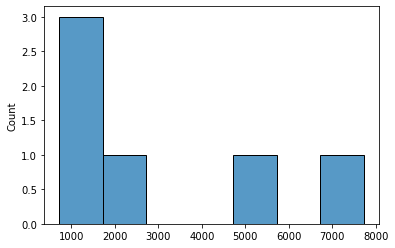

In [16]:
 # plot
sns.histplot(result_list, binwidth = 1000);

 # compute std
all_std = np.array(result_list).std()
all_std

Make a plot of standard deviation of outcomes (y-axis) vs. poll sample size (x-axis).

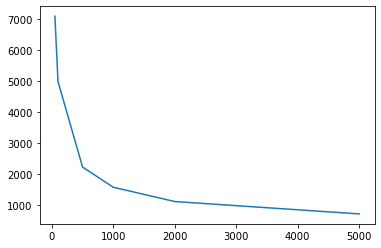

In [17]:
x = [50, 100, 500, 1000, 2000, 5000]
y = result_list

sns.lineplot(x = x, y = y);

Based on this plot, why do you think almost all polls sample around 2000 people?

* The standard deviation become smaller and more stable when the sample size increase since there would be more data and reduce the differences between each data point.

---

### Re-Write the Multi-Poll Code 

The code for combining three polls using a weighted average works, but it is awkward. Changing it to handle a different number of polls would involve lots of copying and pasting and mistake-prone editing.

Make the code "Pythonic" so that all you have to do is provide a list (or tuple) of poll results and another for poll weights, and your code will do the rest. 

Your code can be just code in a code cell. But if you're feeling spicy, you could make it a function!

In [23]:
def multiple_poll(poll_weight,poll_samp_szs):
    rng = np.random.default_rng(42)
    sum_of_w = np.sum(poll_weight)
    samp_sz = 2000                       # poll sample size
    n_sims = 20000 
    
    poll_results = []
    poll_probs = []
        
    for polls in poll_samp_szs:
        rng = np.random.default_rng(42)
        poll_results.append(rng.binomial(samp_sz, polls, n_sims))
    # convert poll total to probablities 
    for poll in poll_results:
        poll_probs.append(poll/samp_sz)
    
    # set the number of voters
    n_voters = 100000
    elec_results = []
    
    for i in range(len(poll_samp_szs)): 
        rng = np.random.default_rng(42)
        elec_results.append(rng.binomial(n_voters, poll_probs[i], n_sims))
    
    # compute weighted average
    print(elec_results)
    weighted_sum = 0
    
    for i in range(len(poll_samp_szs)):
        weighted_sum += (poll_weight[i] * elec_results[i])
    weigthed_average = weighted_sum / sum_of_w
    
    return weigthed_average

---

### Weight polls by sample size

Use your new code to compute predicted election outcomes based on 5 polls weighted by the sample sizes of the polls (or their square root, if you prefer – wink wink, nudge nudge). The polls are as follows:

`poll_ests = [.51, .55, .53, .49, 0.50]`

`poll_samp_szs = [2000, 1000, 1500, 1200, 1142]`

In [24]:
poll_ests = [.51, .55, .53, .49, 0.50]
poll_samp_szs = [2000, 1000, 1500, 1200, 1142]

test_1 = multiple_poll(poll_samp_szs,poll_ests)
test_1

[array([50843, 53047, 51800, ..., 48582, 52030, 50859]), array([56541, 54596, 57099, ..., 55459, 53851, 56437]), array([52843, 55046, 53800, ..., 55307, 54854, 53979]), array([49157, 46953, 48200, ..., 51418, 47970, 49141]), array([48407, 50547, 47900, ..., 48982, 51030, 50809])]


array([51411.96930722, 52225.55890091, 51730.60508623, ...,
       51625.62759427, 52036.28471207, 52048.60830167])

Make a plot of the distribution of simulated outcomes, with the area representing the underdog winning highlighted.

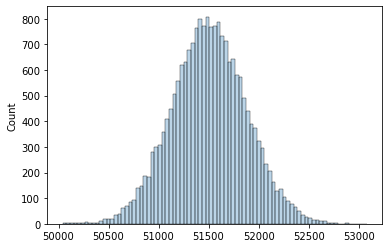

In [28]:
sns.histplot(test_1, alpha = 0.3);

# If  n_voters = 100,000 people, the mininum number of votes that each candidate need to have to win an election is at least 50,001.
sns.histplot(test_1[test_1 < 50001], alpha = 0.3);

In [29]:
test_1[test_1 < 50001]  # NA

array([], dtype=float64)

---

Bonus (totally optional): 
Write your own function, `my_binom()` that does the same thing as `rng.binomial()`. The function should use `rng.random()` internally. To the user, it should behave just like `rng.binomial()`!

In [30]:
def my_biom(seed,n,p,size):
    rng = np.random.default_rng(seed)
    new_value = rng.binomial(n, p,size)
    return new_value

In [31]:
print(my_biom(42,20,0.85,100000))

[16 17 15 ... 17 19 15]


---